In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from matplotlib import style
style.use('dark_background')

In [14]:
df = pd.read_csv('temperature2.csv')
df.drop(['year','month'],1,inplace=True)
df['Year-Month'] = pd.to_datetime(df['Year-Month'], format='%Y-%m')
df = df.set_index('Year-Month')
df

,Temperature
Year-Month,
2015-01-01,-0.2
2015-02-01,1.2
2015-03-01,4.6
2015-04-01,9.9
2015-05-01,15.1
2015-06-01,18.1
2015-07-01,22.8
2015-08-01,23.6
2015-09-01,19.4


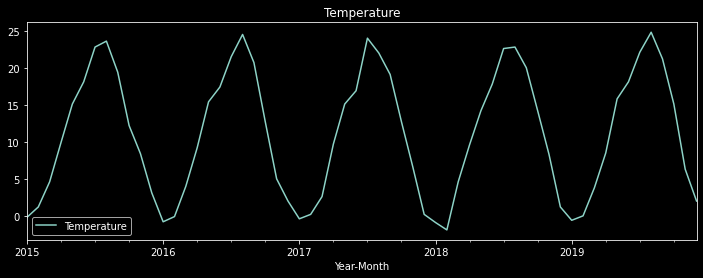

In [15]:
df.plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Temperature')
plt.show(block=False)

In [16]:
train_len = 50
train = df[0:train_len]
test = df[train_len:]

In [18]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing as es
model = es(np.asarray(train['Temperature']), seasonal_periods=12, trend='add', seasonal='add') 
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa = test.copy()
y_hat_hwa['hwa_forecast'] = model_fit.forecast(10)

{'smoothing_level': 1.4901208291412536e-08, 'smoothing_trend': 2.612005450153819e-09, 'smoothing_seasonal': 0.0, 'damping_trend': nan, 'initial_level': -0.7274346469520389, 'initial_trend': -0.011546679048015228, 'initial_seasons': array([ 0.43603031,  0.90746599,  4.92002447, 10.5815688 , 15.9430526 ,
       18.55455263, 23.74116492, 24.25272929, 20.83914665, 14.00067697,
        8.13730838,  2.6987907 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
